# Simple Region With 4 Connectivity 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [2]:
def pic():
    # initialize our canvas as a 300x300 pixel image with 3 channels
    # (Red, Green, and Blue) with a black background
    canvas3 = np.zeros((300, 300, 1), dtype="uint8")
    # blue=(0,0,255)
    cv2.rectangle(canvas3, (100, 100), (200, 200), 1, -1)

    plt.subplot(221), plt.imshow(canvas3, cmap='gray')
    plt.title('Single Region'), plt.xticks([]), plt.yticks([])
    return canvas3

(300, 300, 1)

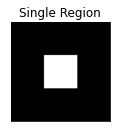

In [3]:
arr = pic()
width = arr.shape[0]
length = arr.shape[1]
arr.shape

In [4]:
def find_first_pixel(arr):
    stop_flag=0
   # canvas3 = pic()
    length = arr.shape[0]
    width = arr.shape[1]
    for i in range(length):
        if (stop_flag==0):
            for j in range(width):
                if (arr[i][j] == 1):
                    x = i
                    y = j
                    stop_flag=1
                    break
    return (x, y)


f = find_first_pixel(arr)
print(f)

(100, 100)


In [5]:
# works but doesn't handle outside pic pixels
def border_tracing_4(arr):
    p0 = find_first_pixel(arr)
    row = p0[0] #current row
    col = p0[1] #current_column
    borders = [p0] #list to add p (border pixels)
    dirc = 3
    search = (dirc+3) % 4 #the next direction we're gonna check

    while(1):
        search_col = col #column of the next direction
        search_row = row            #row of the next direction
            
        if (search == 0):
            search_col = col+1 
        
        if (search == 1):
            search_row = row-1          
            if (search_row < 0):
                search=search+1            
        
        if (search == 2):
            search_col = col-1
            if (search_col < 0):
                search=search+1
               
        if (search == 3):
            search_row = row+1  

                
        if (arr[search_row][search_col] == 1): #when we find a pixel with intensity=1
            row = search_row
            col = search_col
            borders.append((row,col))
            if (borders[-1] == borders[1] and borders[-2] == borders[0] and len(borders)>2): #stopping criteria
                break 
                
            if(borders[-1][1] > borders[-2][1]): # to right
                dirc = 0                  
            elif(borders[-1][0] < borders[-2][0]): #upwards
                dirc = 1
            elif(borders[-1][1] < borders[-2][1]): #to left
                dirc = 2                      
            elif(borders[-1][0] > borders[-2][0]): #downwards 
                dirc = 3        
            search = (dirc+3) % 4
            
        else:
            search = search+1
            if(search>3):
                search=0

    return borders #coz last two vals are repeated
    
b=border_tracing_4(arr)
b    

[(100, 100),
 (101, 100),
 (102, 100),
 (103, 100),
 (104, 100),
 (105, 100),
 (106, 100),
 (107, 100),
 (108, 100),
 (109, 100),
 (110, 100),
 (111, 100),
 (112, 100),
 (113, 100),
 (114, 100),
 (115, 100),
 (116, 100),
 (117, 100),
 (118, 100),
 (119, 100),
 (120, 100),
 (121, 100),
 (122, 100),
 (123, 100),
 (124, 100),
 (125, 100),
 (126, 100),
 (127, 100),
 (128, 100),
 (129, 100),
 (130, 100),
 (131, 100),
 (132, 100),
 (133, 100),
 (134, 100),
 (135, 100),
 (136, 100),
 (137, 100),
 (138, 100),
 (139, 100),
 (140, 100),
 (141, 100),
 (142, 100),
 (143, 100),
 (144, 100),
 (145, 100),
 (146, 100),
 (147, 100),
 (148, 100),
 (149, 100),
 (150, 100),
 (151, 100),
 (152, 100),
 (153, 100),
 (154, 100),
 (155, 100),
 (156, 100),
 (157, 100),
 (158, 100),
 (159, 100),
 (160, 100),
 (161, 100),
 (162, 100),
 (163, 100),
 (164, 100),
 (165, 100),
 (166, 100),
 (167, 100),
 (168, 100),
 (169, 100),
 (170, 100),
 (171, 100),
 (172, 100),
 (173, 100),
 (174, 100),
 (175, 100),
 (176, 100),

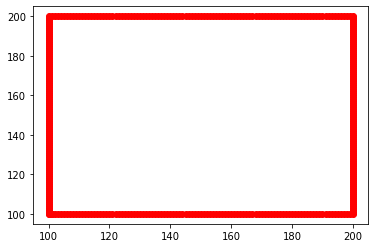

In [6]:
#plot borders to make sure we got it right
data_in_array = np.array(b)
transposed = data_in_array.T 
x, y = transposed 
plt.plot(x, y, 'ro')

#yaaaaaaaaaaaaaaaaaaaaaaaaay <3 .. Alexa play "we made it" by louis 

# Multiple Regions With 8 Connectivity

In [7]:

def pic():
    # initialize our canvas as a 300x300 pixel image with 3 channels
    # (Red, Green, and Blue) with a black background
    canvas1 = np.zeros((300, 300, 1), dtype="uint8")
    cv2.rectangle(canvas1, (100, 100), (200,200),1,-1)
    cv2.rectangle(canvas1, (30, 225), (250, 200),1, -1)

    plt.subplot(221), plt.imshow(canvas1, cmap='gray')
    plt.title('Multiple Region'), plt.xticks([]), plt.yticks([])
    return canvas1


In [8]:
len(b)

402

(300, 300, 1)

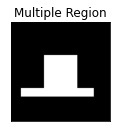

In [9]:
arr = pic()
width = arr.shape[0]
length = arr.shape[1]
arr.shape

In [10]:
def find_first_pixel(arr):
    stop_flag=0
   # canvas3 = pic()
    length = arr.shape[0]
    width = arr.shape[1]
    for i in range(length):
        if (stop_flag==0):
            for j in range(width):
                if (arr[i][j] == 1):
                    x = i
                    y = j
                    stop_flag=1
                    break
    return (x, y)


f = find_first_pixel(arr)
print(f)

(100, 100)


In [12]:
def border_tracing(connectivity,arr):
    p0 = find_first_pixel(arr)
    row = p0[0] #current row
    col = p0[1] #current_column
    borders = [p0] #list to add p (border pixels)
    if (connectivity == 4):
        dirc = 3
        search = (dirc+3) % 4 #the next direction we're gonna check

        while(1):
            search_col = col #column of the next direction
            search_row = row            #row of the next direction
            
            if (search == 0):
                search_col = col+1 
        
            if (search == 1):
                search_row = row-1          
                if (search_row < 0):
                    search=search+1            
            if (search == 2):
                search_col = col-1
                if (search_col < 0):
                    search=search+1
               
            if (search == 3):
                search_row = row+1  

                
            if (arr[search_row][search_col] == 1): #when we find a pixel with intensity=1
                row = search_row
                col = search_col
                borders.append((row,col))
                if (borders[-1] == borders[1] and borders[-2] == borders[0] and len(borders)>2): #stopping criteria
                    break 
                
                if(borders[-1][1] > borders[-2][1]): # to right
                    dirc = 0                  
                elif(borders[-1][0] < borders[-2][0]): #upwards
                    dirc = 1
                elif(borders[-1][1] < borders[-2][1]): #to left
                    dirc = 2                      
                elif(borders[-1][0] > borders[-2][0]): #downwards 
                    dirc = 3        
                search = (dirc+3) % 4
            
            else:
                search = search+1
                if(search>3):
                    search=0
                    
    if (connectivity == 8):
        
        dirc = 7
        
        #check dir even or odd
        
        if (dir%2==0):
            search = (dirc+7) % 8 #the next direction we're gonna check
        else
            search = (dirc+6) % 8
        #########################
        
        #loop for iteration pixels
        while(1):
                
            search_col = col  #column of the next direction
            search_row = row   #row of the next direction
            
            #increase colum
            if (search == 0):
                search_col = col+1 
        
            # increase colum & decrease row
            if (search == 1):
                search_col = col+1
                search_row = row-1  
                
                
                #check if row 0 after decrease
                if (search_row < 0):
                    search=search+1 
            
            #decrease row
            if (search == 2):
                search_row = row-1 
                
                #check if row 0 after decrease
                if (search_row < 0):
                    search=search+1 
             
            #decrease row & colum
            if (search == 3):
                search_col = col-1
                search_row = row-1 
                
                if (search_row < 0):
                    search=search+1 
                if (search_col < 0):
                    search=search+1    
        
        #decrease colum
            if (search == 4):
                search_col = col-1  
                
                if (search_col < 0):
                    search=search+1 
              
            #increase row & decrease colum
            if (search == 5):
                search_row = row+1  
               
                search_col = col-1  
                
                if (search_col < 0):
                    search=search+1 
        
        #increase row
        
            if (search == 6):
                search_row = row+1  
        
        #increase row & increase colum
            if (search == 7):
                 search_row = row+1  
                 search_col = col+1  
        
        
        return borders [:-2] #coz last two vals are repeated
    
b=border_tracing(4,arr)
b    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 126)

In [ ]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 1), dtype="uint8")
# let's draw 25 random circles
for i in range(0, 2):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(10, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))
	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)
plt.subplot(221), plt.imshow(canvas, cmap='gray')
plt.title('Multiple Region'), plt.xticks([]), plt.yticks([])

In [ ]:
import numpy as np
import cv2

# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas3 = np.zeros((300, 300, 1), dtype="uint8")
#blue=(0,0,255)
cv2.rectangle(canvas3, (100, 100), (200,200),1,-1)



plt.subplot(221), plt.imshow(canvas3, cmap='gray')
plt.title('Single Region'), plt.xticks([]), plt.yticks([])
#cv2.imshow("Canvas", canvas)
#cv2.waitKey(0)